# Supervised Learning | Classification (Model Selection & Evaluation)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# sns.set()

In [2]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


==========

## Model Selection & Evaluation

### Model Selection

In [3]:
from IPython.display import Image
Image("imgs/ml_map.png")

FileNotFoundError: No such file or directory: 'imgs/ml_map.png'

FileNotFoundError: No such file or directory: 'imgs/ml_map.png'

<IPython.core.display.Image object>

Choosing the Right Estimator: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Importing Dataset

In [4]:
df = pd.read_csv('heights_weights.csv')
df

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1
...,...,...,...
9995,66.172652,136.777454,0
9996,67.067155,170.867906,0
9997,63.867992,128.475319,0
9998,69.034243,163.852461,0


In [5]:
df.round(2)

,Height,Weight,Male
0,73.85,241.89,1
1,68.78,162.31,1
2,74.11,212.74,1
3,71.73,220.04,1
4,69.88,206.35,1
...,...,...,...
9995,66.17,136.78,0
9996,67.07,170.87,0
9997,63.87,128.48,0
9998,69.03,163.85,0


### Exploring Data

<Axes: xlabel='Height', ylabel='Weight'>

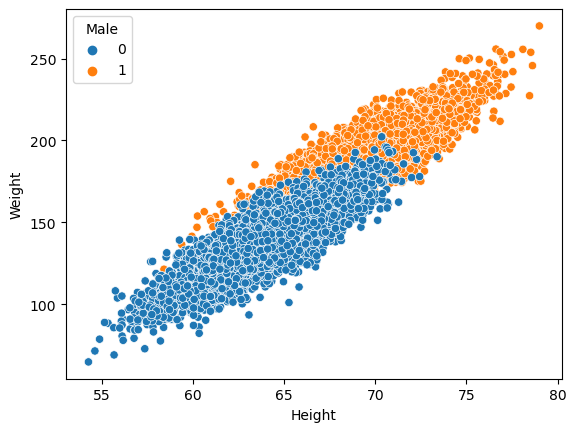

In [6]:
sns.scatterplot(x="Height", y="Weight", hue="Male", data=df)

### Splitting & Preprocessing Data

In [7]:
X = df.iloc[:,0:2].values 
X 

array([[ 73.84701702, 241.89356318],
       [ 68.78190405, 162.31047252],
       [ 74.11010539, 212.74085556],
       ...,
       [ 63.86799221, 128.47531878],
       [ 69.03424313, 163.85246135],
       [ 61.94424588, 113.64910268]])

In [8]:
y = df.iloc[:,2].values
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0) #test size =30%

In [10]:
X_train.shape

(7000, 2)

In [11]:
X_test.shape

(3000, 2)

In [12]:
Y_train.shape

(7000,)

In [13]:
Y_test.shape

(3000,)

### Model Selection & Evaluation

Scikit-learn Classification Metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Youssef\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

### 1] Logestic Regression Performance

In [15]:
from sklearn.linear_model import LogisticRegression

# Fit (train) the Logistic Regression classifier
logreg_clf = LogisticRegression()
logreg_model = logreg_clf.fit(X_train, Y_train)
logreg_prediction = logreg_clf.predict(X_test)

In [16]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(logreg_prediction, Y_test)))

Accuracy 91.87%


In [17]:
print(confusion_matrix(logreg_prediction, Y_test))

[[1385  140]
 [ 104 1371]]


In [18]:
#plot_confusion_matrix(logreg_clf, X_test, Y_test)

In [19]:
print(classification_report(logreg_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1525
           1       0.91      0.93      0.92      1475

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



### 2] Random Forest Performance

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Fit (train) the Random Forest classifier
ranfor_clf = RandomForestClassifier()
ranfor_model = ranfor_clf.fit(X_train, Y_train)
ranfor_prediction = ranfor_clf.predict(X_test)

In [21]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(ranfor_prediction, Y_test)))

Accuracy 90.37%


In [22]:
print(confusion_matrix(ranfor_prediction, Y_test))

[[1375  175]
 [ 114 1336]]


In [23]:
#plot_confusion_matrix(ranfor_clf, X_test, Y_test)

In [24]:
print(classification_report(ranfor_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1550
           1       0.88      0.92      0.90      1450

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



### 3] Support Vector Machine Performance

In [25]:
from sklearn.svm import SVC

# Fit (train) the Support Vector Machine classifier
svm_clf = SVC()
svm_model = svm_clf.fit(X_train, Y_train)
svm_prediction = svm_clf.predict(X_test)

In [26]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(svm_prediction, Y_test)))

Accuracy 91.40%


In [27]:
print(confusion_matrix(svm_prediction, Y_test)) #abos 3al qym deh el arb3a w aqarnhom beli fo22 lhd ma a5od el cross validation heya eli ht2oli anhy ahsan algorithm

[[1382  151]
 [ 107 1360]]


In [28]:
#plot_confusion_matrix(svm_clf, X_test, Y_test)

In [29]:
print(classification_report(svm_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91      1533
           1       0.90      0.93      0.91      1467

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



### 4] K-NN Classifier Performance

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Fit (train) the KNN classifier
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, Y_train)
knn_prediction = knn_clf.predict(X_test)

In [31]:
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, Y_test)))

Accuracy 90.27%


In [32]:
print(confusion_matrix(knn_prediction, Y_test))

[[1367  170]
 [ 122 1341]]


In [33]:
#plot_confusion_matrix(knn_clf, X_test, Y_test)

In [34]:
print(classification_report(knn_prediction, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1537
           1       0.89      0.92      0.90      1463

    accuracy                           0.90      3000
   macro avg       0.90      0.90      0.90      3000
weighted avg       0.90      0.90      0.90      3000



### Other Evaluation Metrics

##### Logistic Regression

##### Random Forest

##### Support Vector Machine

##### K-NN Classifier

==========

# THANK YOU!